## Exercise 2. Generalization Error and Regularization

Consider the input space $\mathcal{X} = [-1,1]$ and $\mathcal{Y} = \mathbb{R}$, and the following ground-truth function:

$y = f(x) = 0.1 x^3 - 0.025 x^2 + 0.01 x + 0.2$

1. Draw a random training set of size 25, using the following rule:

$y = f(x) + \epsilon, x \sim \text{Uniform}([-1,1]), \epsilon \sim \mathcal{N}(0, 10^{-4})$

2. Draw a test set of size 100 using the ground-truth function above.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def f(x):
    return 0.1 * x**3 - 0.025 * x**2 + 0.01 * x + 0.2

In [75]:
def draw_sample(n):
    x = np.random.uniform(-1, 1, n)
    y = f(x) + np.random.normal(0, 0.01)
    
    return n, x, y

In [84]:
n_train, x_train, y_train = draw_sample(25)
n_test,  x_test,  y_test = draw_sample(100)
x_true = np.arange(-1, 1, 0.02)
y_true = f(x_true)
# print(x_train)
# print(y_train)

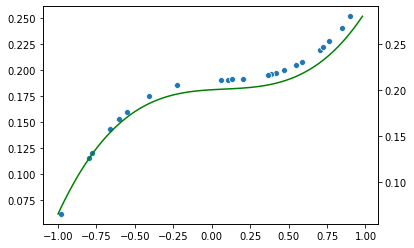

In [92]:
fig, ax = plt.subplots()
sns.scatterplot(x=x_train, y=y_train, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x_true, y=y_true, ax=ax2, color='g')

In [93]:
plt.clf()

<Figure size 432x288 with 0 Axes>

3. Fit an order $k$ polynomial and plot train and test error vs $k$ for $k = {0, \ldots, 15}$. Use the mean squared error $l(y, \hat y) = \frac{1}{N} \sum_i (y_i - \hat y_i)^2$ to compute train and test errors

In [86]:
def fit(k, x, y, lamb=0):
    # Find polynomial 'feature' matrix
    phi = np.column_stack([x**i for i in range(k+1)])
    
    # Solve normal eqs
    A = np.dot(phi.T, phi) - lamb * np.eye
    b = np.dot(phi.T, y)
    
    return np.linalg.solve(A, b)
    

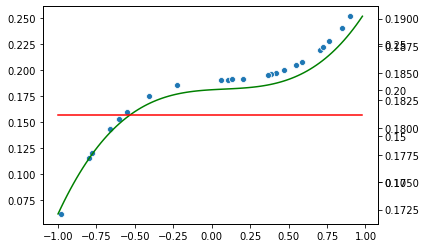

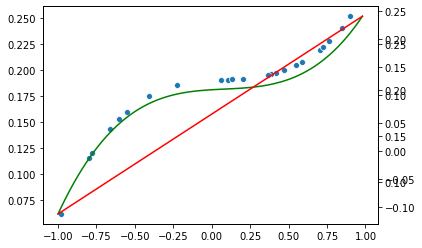

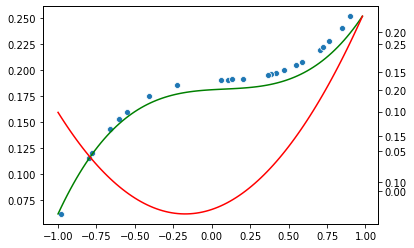

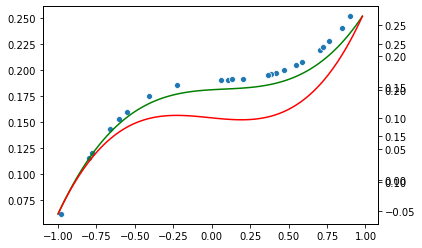

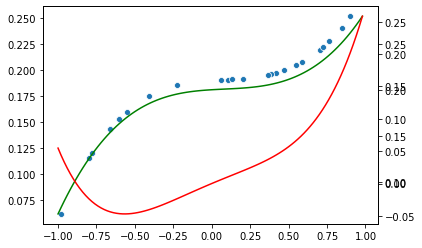

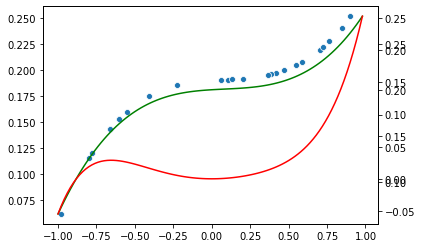

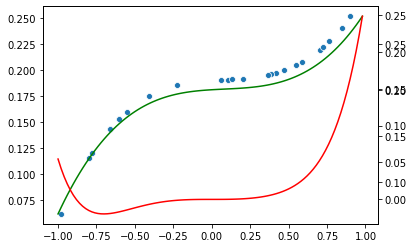

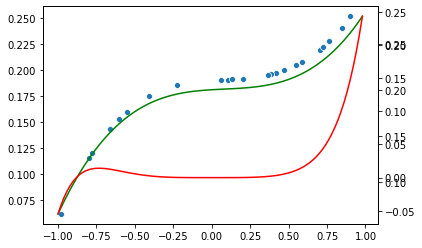

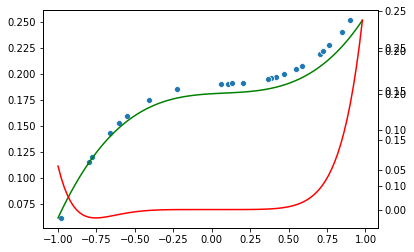

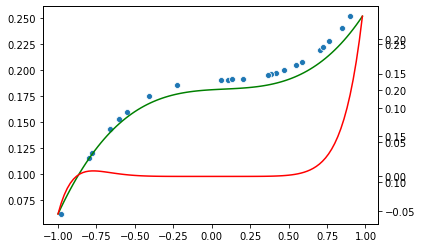

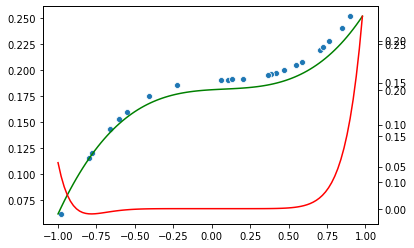

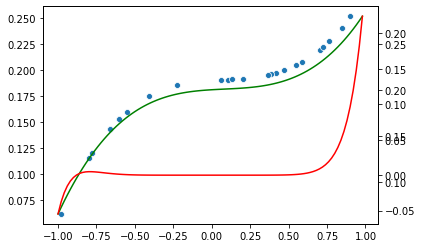

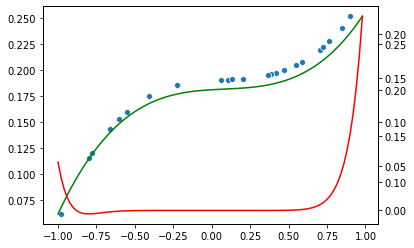

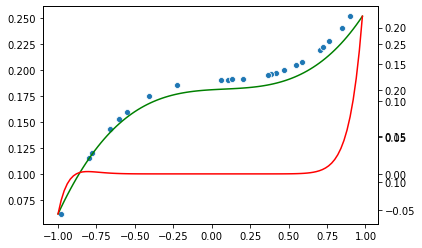

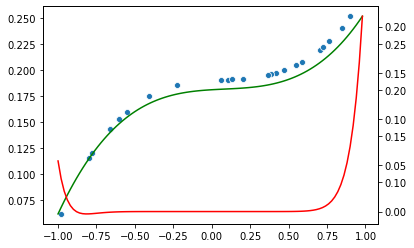

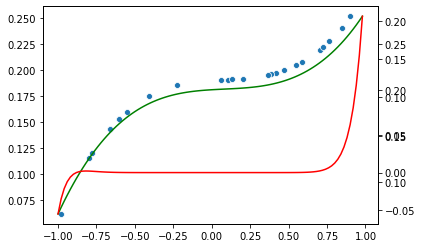

In [95]:
w_all = []
for k in range(15 +1):
    # fit for each polynomial order of k in [0,15]
    w = fit(k, x_train, y_train)
    w_all.append(w)
    
    y_pred = np.polyval(w, x_true)
    
    fig, ax = plt.subplots()
    sns.scatterplot(x=x_train, y=y_train, ax=ax)
    ax2 = ax.twinx()
    sns.lineplot(x=x_true, y=y_true, ax=ax2, color='g')
    ax2 = ax.twinx()
    sns.lineplot(x=x_true, y=y_pred, ax=ax2, color='r')

4. For different $k=0,3,15$, draw training sets of growing size: $N=25,250,2500$. Plot test error vs the number of training points.
5. Repeat 4, but fix $k=15$, and plot train and test error vs $\lambda={0, 0.1, 1000}$, the regularization strenght of the l2 penalty

In [ ]:
for N in [25,250,2500]:
    n_train, x_train, y_train = draw_sample(N)
    fit(k, x_train, y_train)